In [26]:
import torch
import matplotlib.pyplot as plt

def load_metrics_from_pt():
    loss = torch.load('/home/hsilva/DLA/Lab2/loss_plot.pt')
    accuracy = torch.load('/home/hsilva/DLA/Lab2/acc_plot.pt')

    return loss, accuracy

def create_metrics_plot(loss, accuracy):
    epochs = len(loss)
    plt.figure(figsize=(10, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), loss, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), accuracy, label='Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.tight_layout()
    

    plt.savefig('finetune1.png')
    plt.show()

# Replace 'metrics.pt' with the actual path to your .pt file
loss, accuracy = load_metrics_from_pt()
#create_metrics_plot(loss, accuracy)

In [10]:
accuracy

tensor([0.6473, 0.6614, 0.6839, 0.6689, 0.6651, 0.6792, 0.6923, 0.6801, 0.6557,
        0.6538, 0.6482, 0.6698, 0.6867, 0.6548, 0.5985, 0.6829, 0.6904])

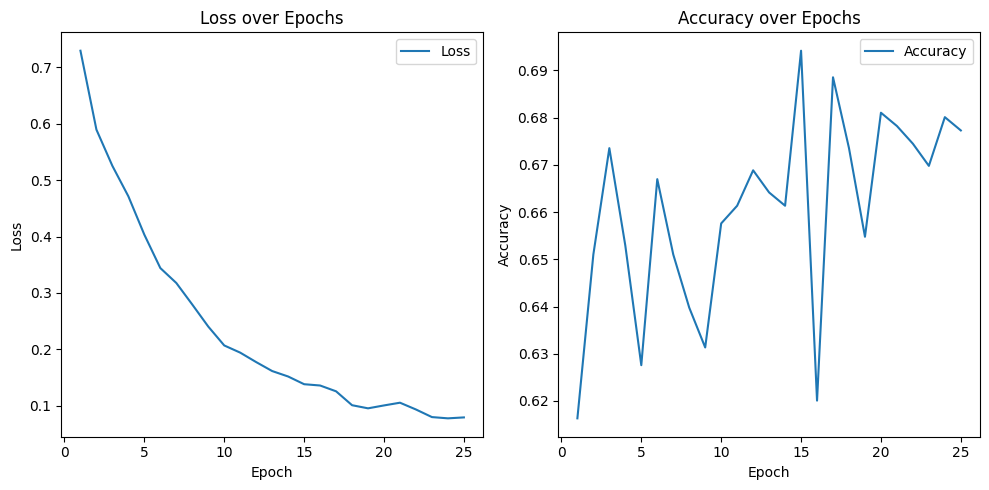

In [27]:
create_metrics_plot(loss, accuracy)